In [ ]:
import zipfile
import os

zip = 'data.zip'
extract_to = 'Dataset'

with zipfile.ZipFile(zip, 'r') as zip_ref:
    # Extract all files to the specified directory
    zip_ref.extractall(extract_to)


In [5]:
import pandas as pd
import os
from PIL import Image
import numpy as np

# Load labels
labels_df = pd.read_csv('label.csv')

class_distribution = labels_df['label'].value_counts()

image_sizes = []
image_folder = 'Ml_Assignment/data' 

for img_name in labels_df['filename']:
    img_path = os.path.join(image_folder, img_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)

image_sizes = np.array(image_sizes)
height_mean, width_mean = image_sizes.mean(axis=0)
height_std, width_std = image_sizes.std(axis=0)

print("Class Distribution:\n", class_distribution)
print(f"Mean Image Size: {height_mean:.2f} x {width_mean:.2f}")
print(f"Std Dev of Image Sizes: {height_std:.2f} x {width_std:.2f}")


Class Distribution:

 label

sitting               840

using_laptop          840

hugging               840

sleeping              840

drinking              840

clapping              840

dancing               840

cycling               840

calling               840

laughing              840

eating                840

fighting              840

listening_to_music    840

running               840

texting               840

Name: count, dtype: int64

Mean Image Size: 260.38 x 196.57

Std Dev of Image Sizes: 39.92 x 35.28


In [ ]:
pip install seaborn

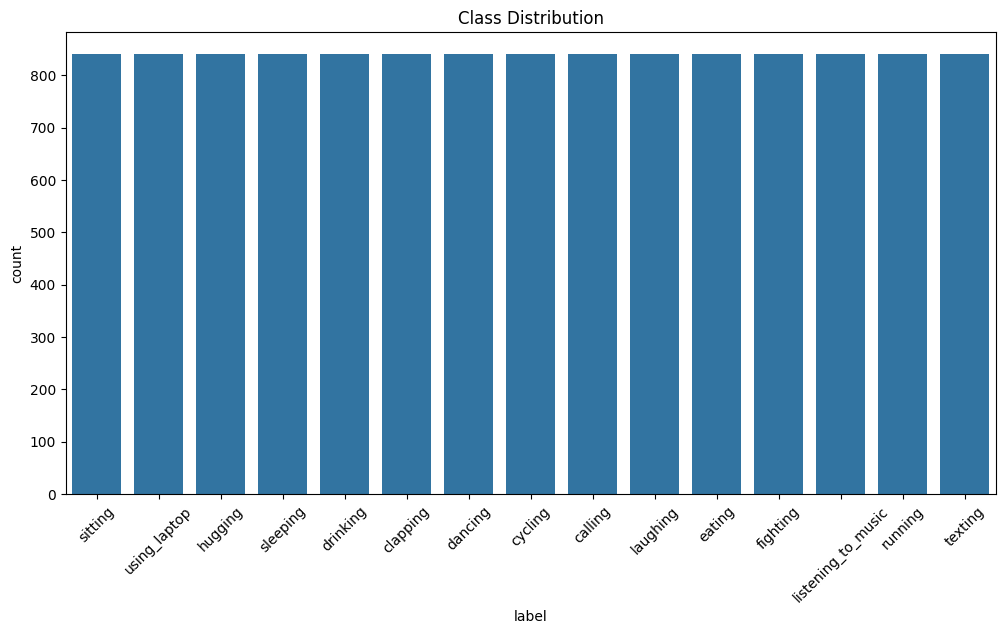

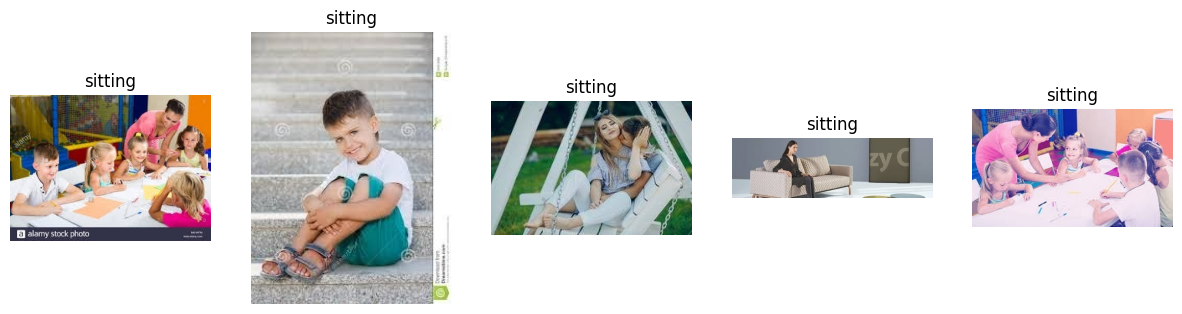

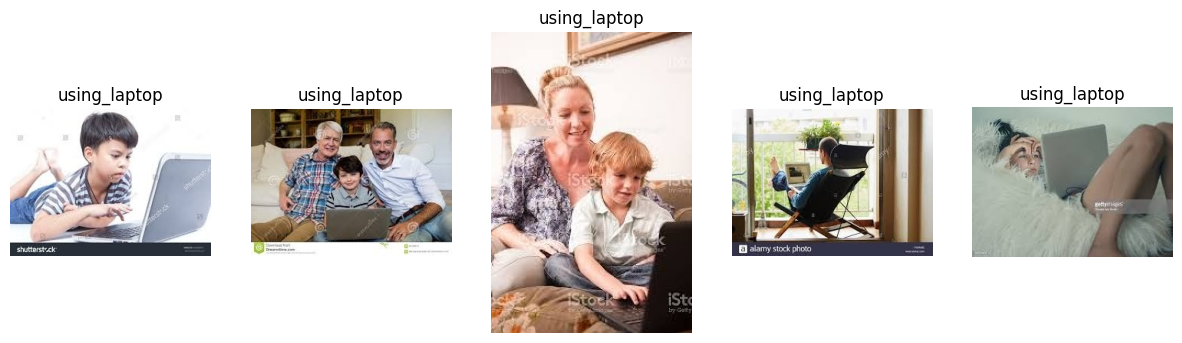

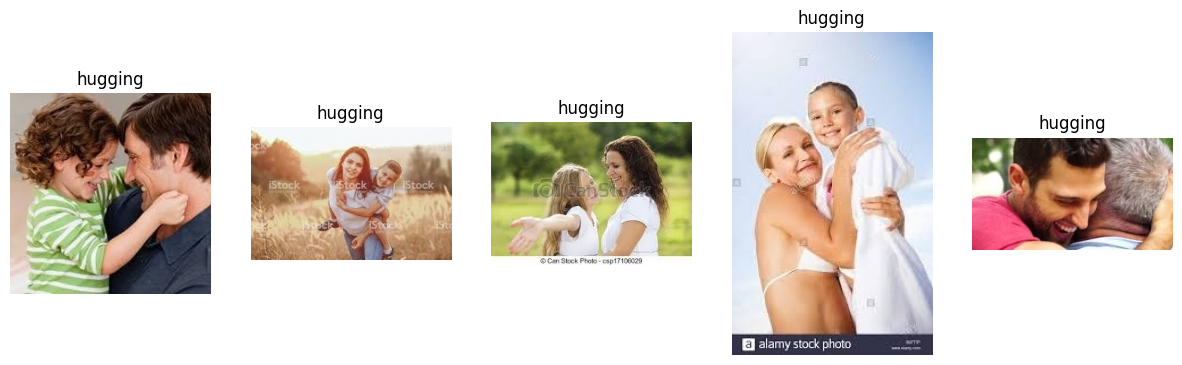

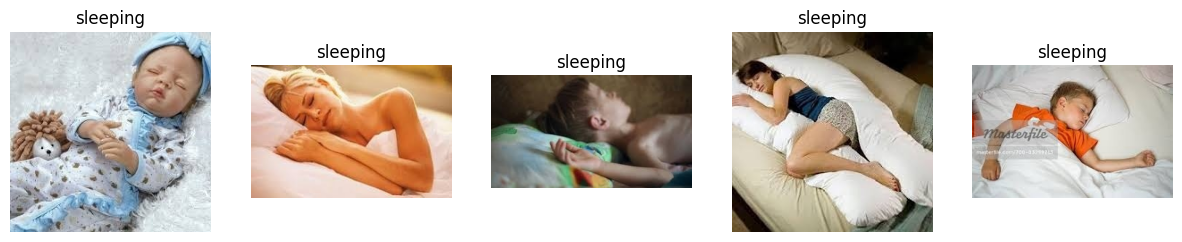

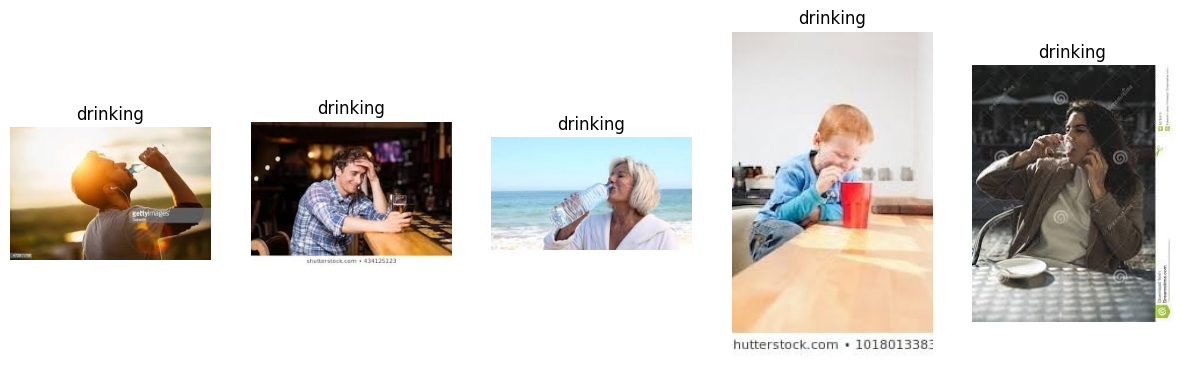

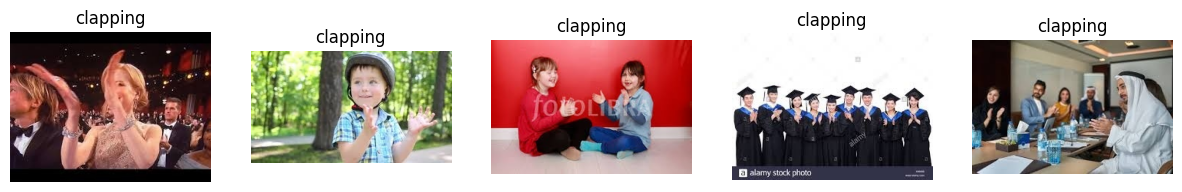

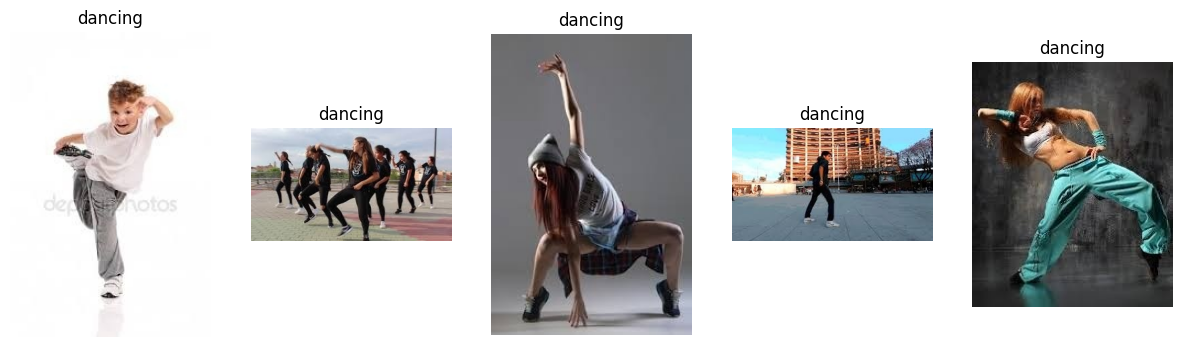

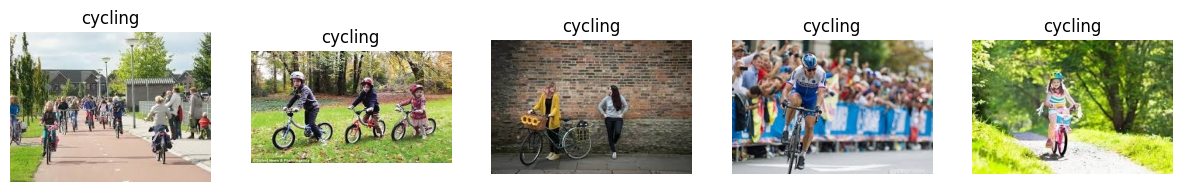

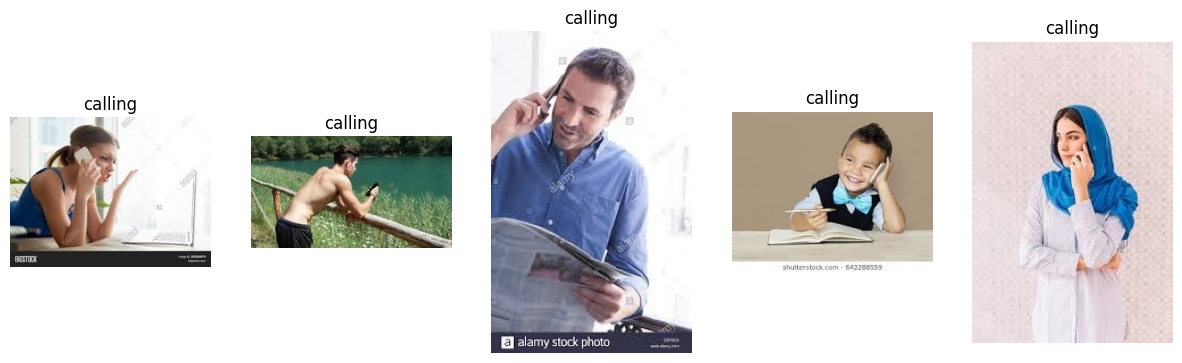

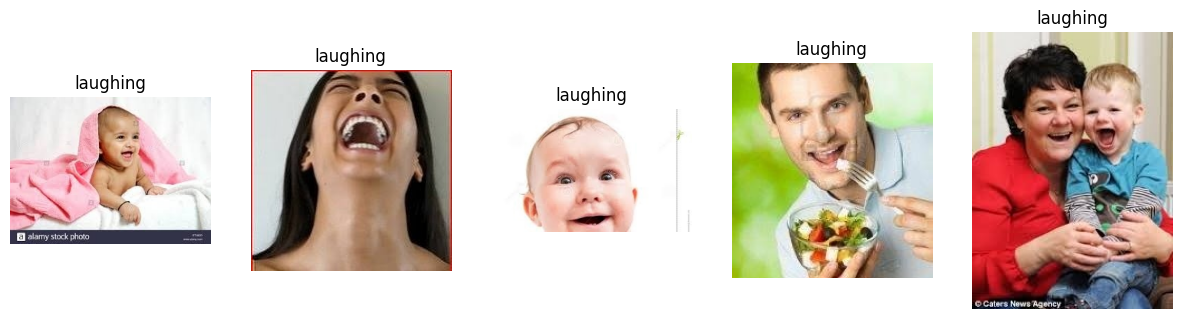

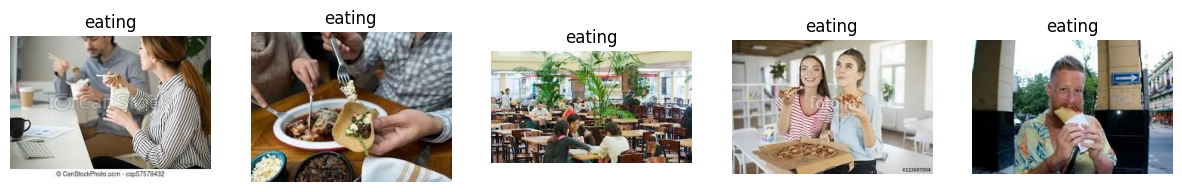

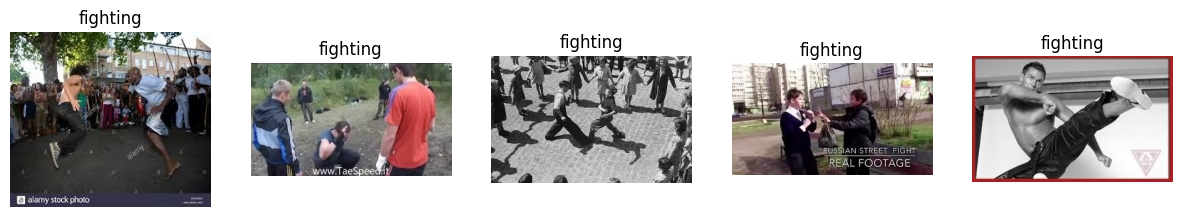

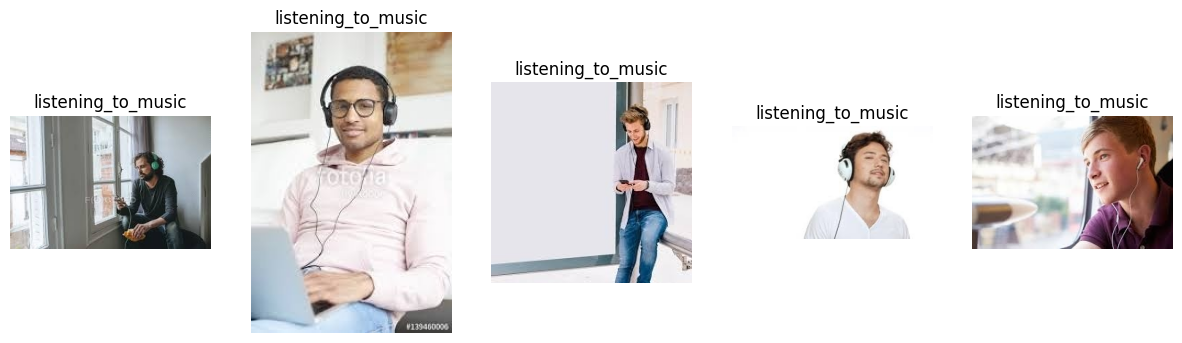

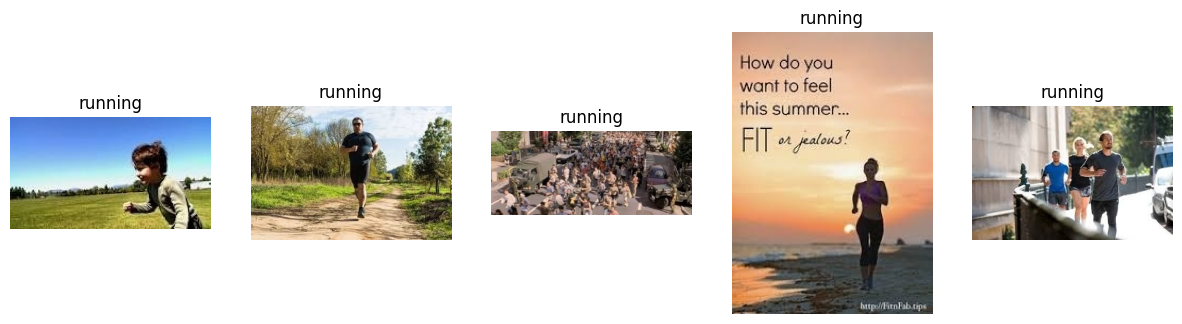

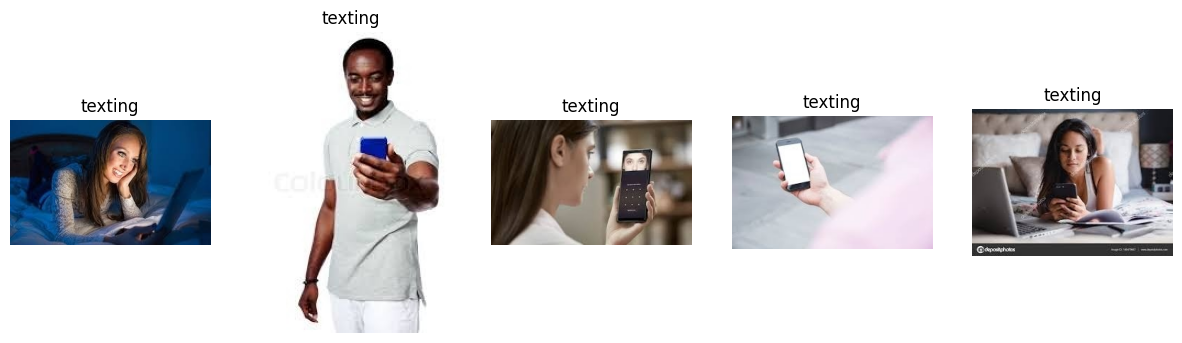

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=labels_df, x='label', order=class_distribution.index)
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

def display_samples(class_name, n=5):
    sample_images = labels_df[labels_df['label'] == class_name].sample(n=n)
    plt.figure(figsize=(15, 5))
    for idx, row in enumerate(sample_images.iterrows()):
        img_path = os.path.join(image_folder, row[1]['filename'])
        img = Image.open(img_path)
        plt.subplot(1, n, idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.show()

for class_name in class_distribution.index:
    display_samples(class_name)


In [ ]:
pip install scikit-image

**HOG feature extraction**

Loading images: 100%|██████████| 12601/12601 [01:00<00:00, 207.10it/s]

Extracting HOG features: 0it [00:00, ?it/s]

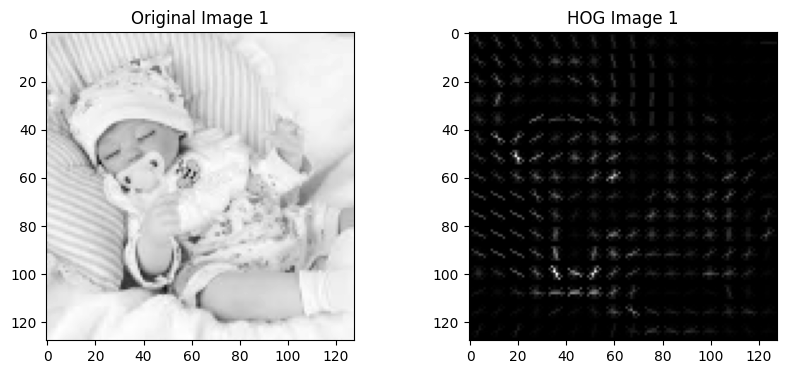

Extracting HOG features: 1it [00:00,  4.00it/s]

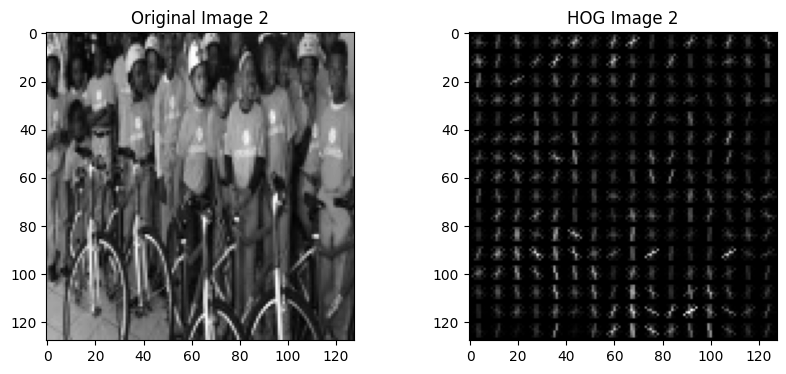

Extracting HOG features: 2it [00:00,  4.01it/s]

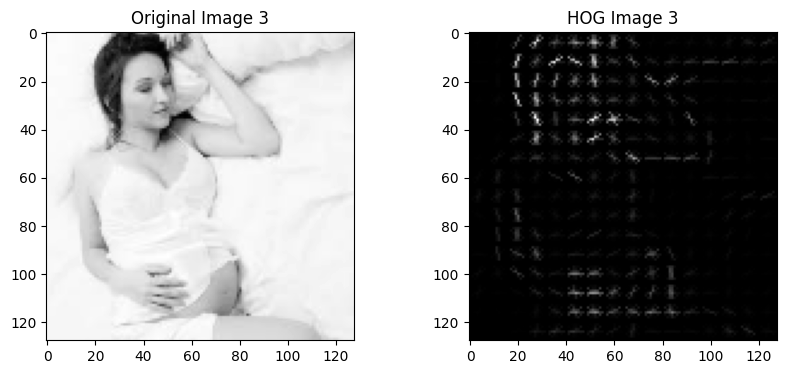

Extracting HOG features: 3it [00:00,  4.21it/s]

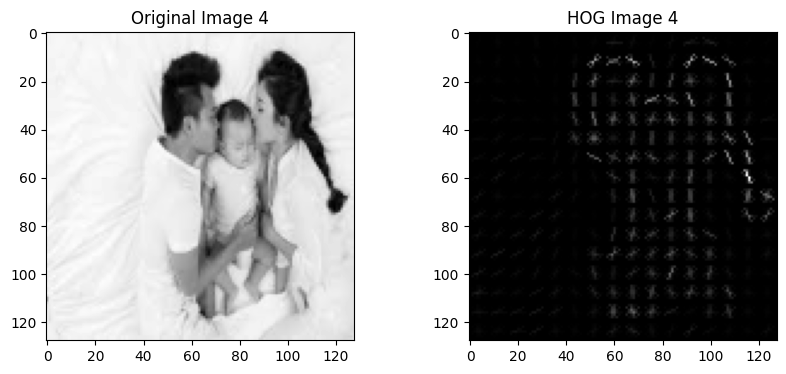

Extracting HOG features: 4it [00:00,  4.27it/s]

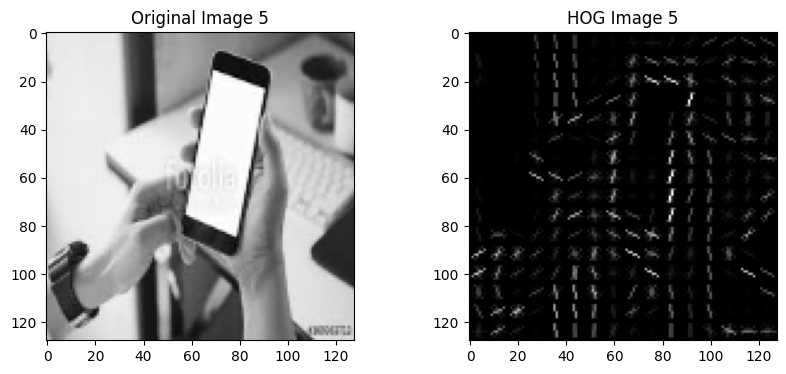

Extracting HOG features: 5it [00:01,  4.31it/s]

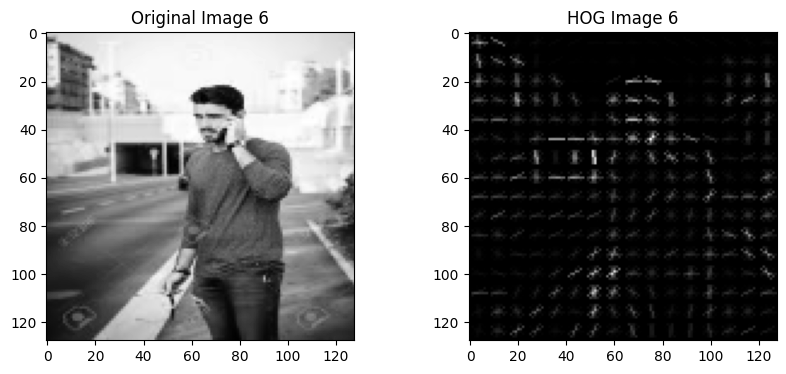

Extracting HOG features: 6it [00:01,  3.79it/s]

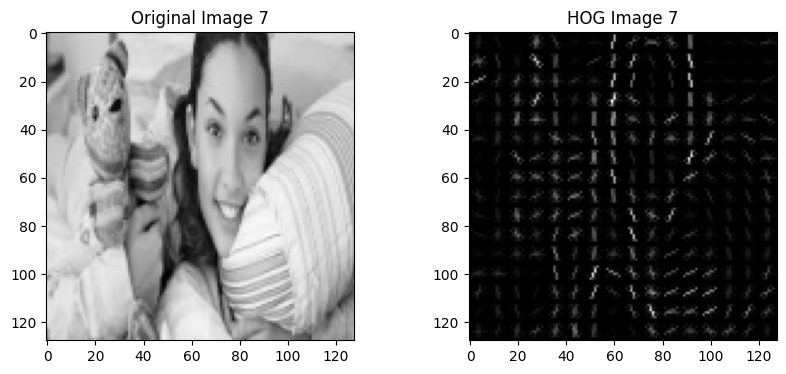

Extracting HOG features: 7it [00:01,  3.92it/s]

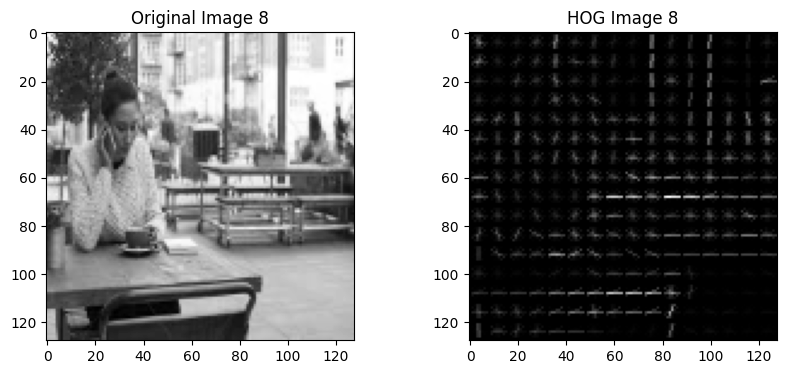

Extracting HOG features: 8it [00:01,  4.01it/s]

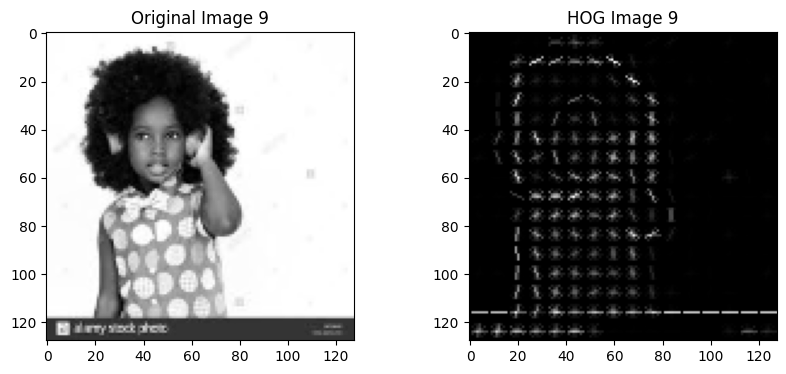

Extracting HOG features: 9it [00:02,  4.15it/s]

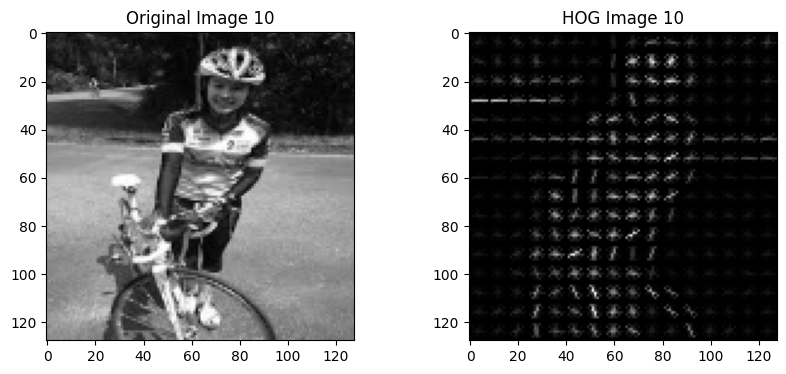

Extracting HOG features: 10it [00:02,  4.18it/s]

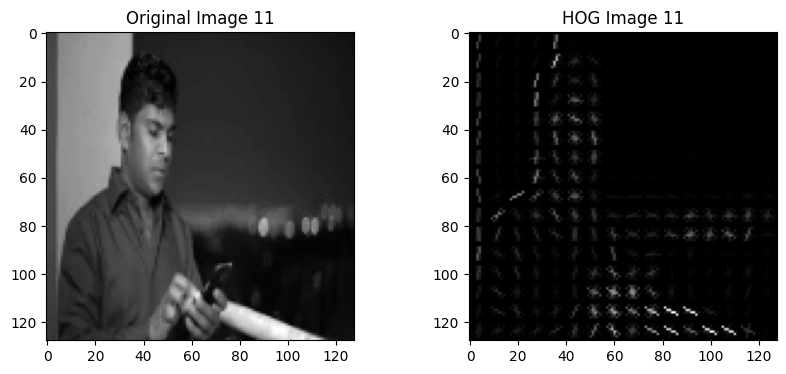

Extracting HOG features: 11it [00:02,  4.30it/s]

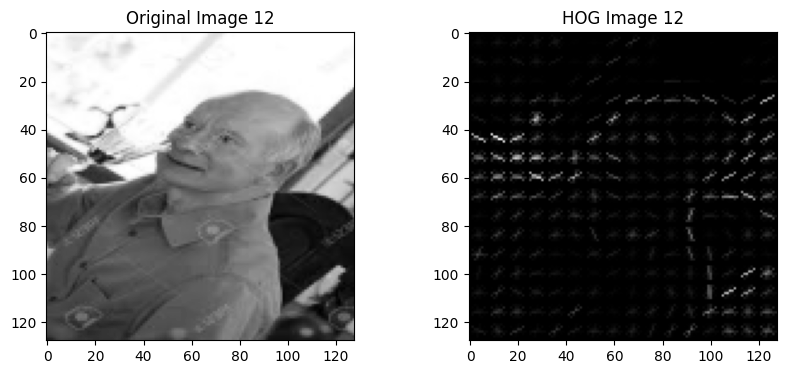

Extracting HOG features: 12it [00:02,  4.36it/s]

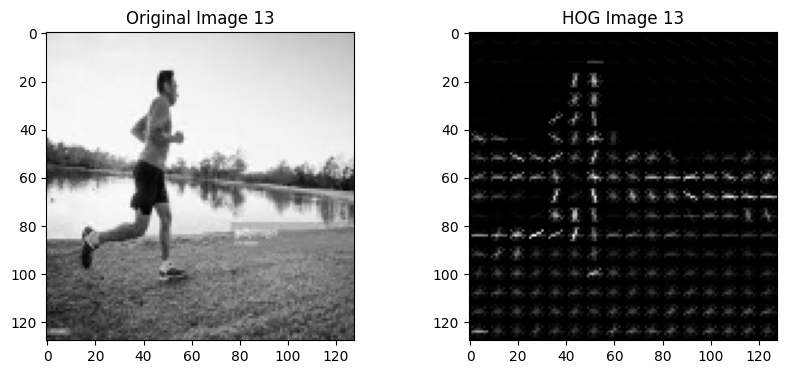

Extracting HOG features: 13it [00:03,  4.37it/s]

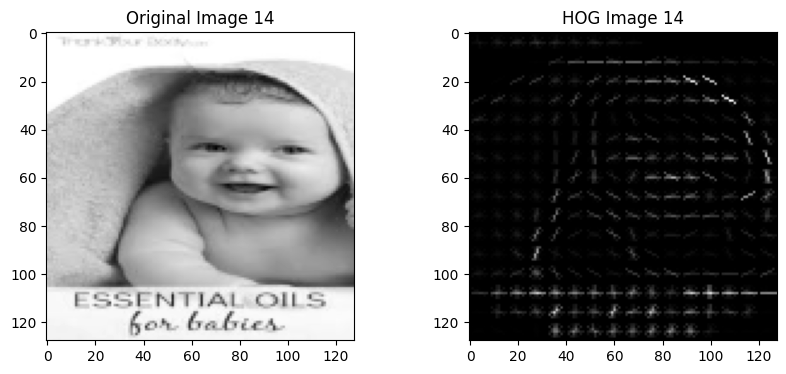

Extracting HOG features: 14it [00:03,  4.41it/s]

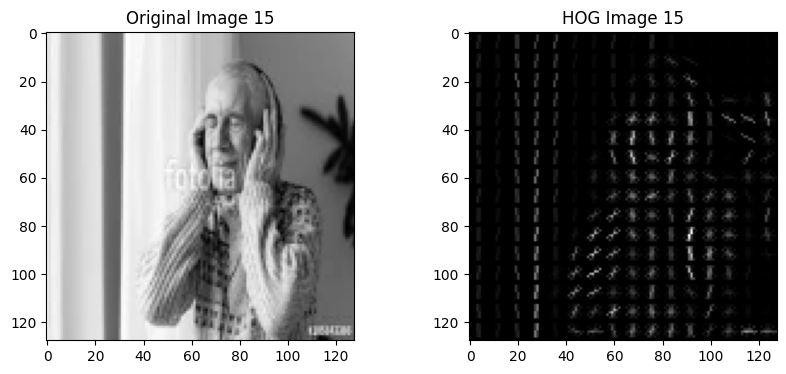

Extracting HOG features: 15it [00:03,  4.48it/s]

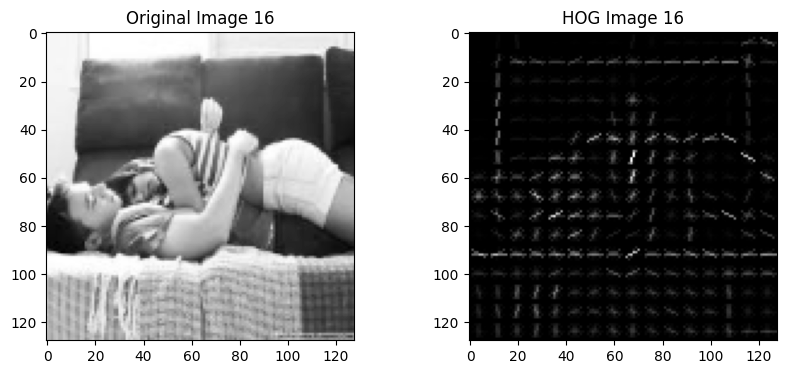

Extracting HOG features: 16it [00:03,  4.50it/s]

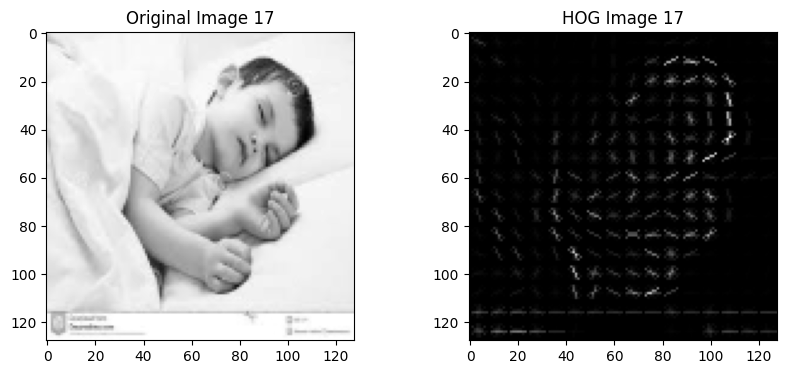

Extracting HOG features: 17it [00:04,  3.93it/s]

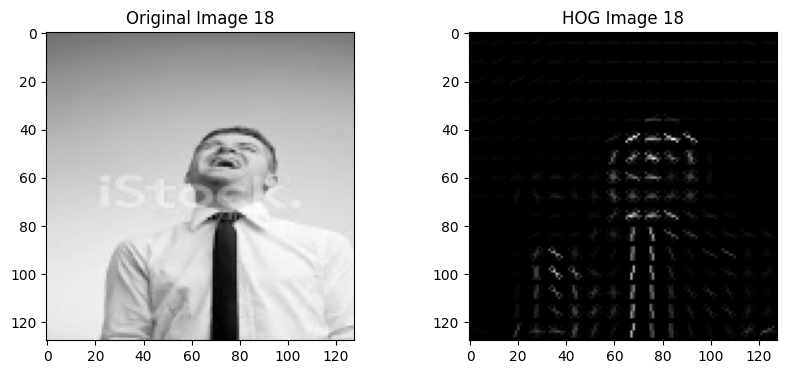

Extracting HOG features: 18it [00:04,  4.14it/s]

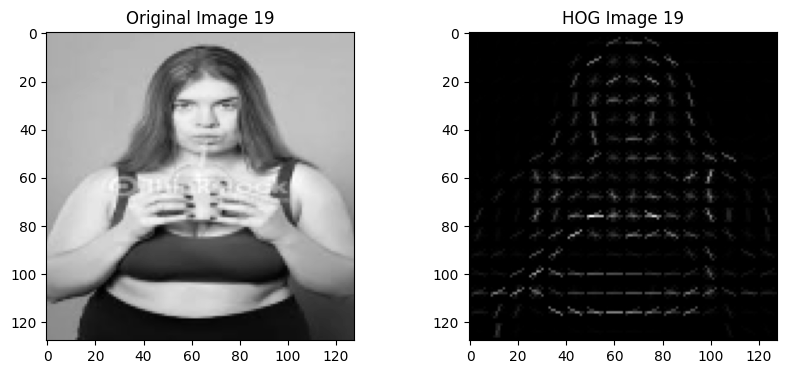

Extracting HOG features: 19it [00:04,  4.22it/s]

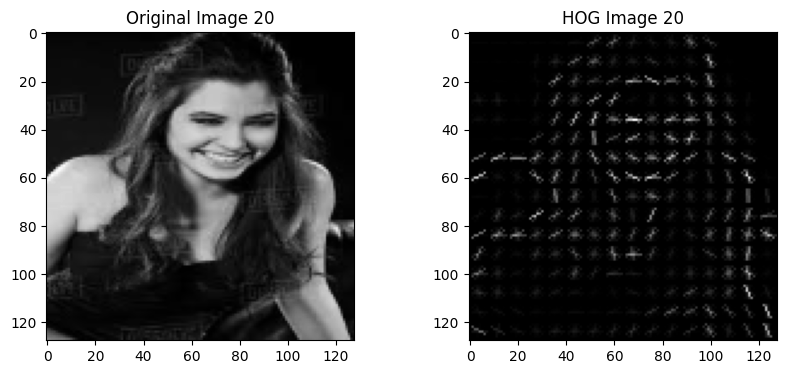

Extracting HOG features: 12600it [07:02, 29.81it/s]


          0         1         2         3         4         5         6  \

0  0.023298  0.014453  0.027768  0.044335  0.100117  0.066850  0.260110   

1  0.265062  0.178128  0.072811  0.000000  0.245108  0.096397  0.242874   

2  0.314956  0.000000  0.070109  0.051723  0.314956  0.000000  0.000000   

3  0.266134  0.109558  0.129011  0.012327  0.073463  0.034740  0.031583   

4  0.208969  0.031647  0.056159  0.000000  0.191552  0.000000  0.002721   



              7         8         9  ...      8091      8092      8093  \

0  3.331229e-01  0.185694  0.138057  ...  0.091618  0.006241  0.038311   

1  1.617676e-01  0.146356  0.265062  ...  0.278305  0.278305  0.043674   

2  1.569144e-15  0.000634  0.314956  ...  0.200699  0.006121  0.015988   

3  2.896461e-02  0.035759  0.266134  ...  0.252731  0.252731  0.252731   

4  7.930886e-02  0.080310  0.067451  ...  0.212578  0.072534  0.078154   



       8094      8095      8096      8097      8098      8099     label  

0  0.092327  0.

In [2]:
import os
import numpy as np
import pandas as pd
from skimage import color, io
from skimage.feature import hog
from skimage.transform import resize
import matplotlib.pyplot as plt
from tqdm import tqdm

def load_images_and_labels(image_folder, csv_file, image_size=(128, 128)):
    label_data = pd.read_csv(csv_file)
    labels_dict = dict(zip(label_data['filename'], label_data['label']))
    
    images = []
    labels = []

    for filename in tqdm(os.listdir(image_folder), desc="Loading images"):
        if filename in labels_dict: 
            img_path = os.path.join(image_folder, filename)
            img = io.imread(img_path)
            if img is not None:
                img_resized = resize(img, image_size, anti_aliasing=True)
                images.append(img_resized)
                labels.append(labels_dict[filename])

    return np.array(images), np.array(labels)

def extract_hog_features_to_df(images, labels, visualize=False, num_display=20):
    hog_features = []
    
    for i, img in tqdm(enumerate(images), desc="Extracting HOG features"):
        gray_img = color.rgb2gray(img)
        hog_feat, hog_image = hog(
            gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
            block_norm='L2-Hys', feature_vector=True, visualize=True
        )
        hog_features.append(hog_feat)

        if visualize and i < num_display:
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(gray_img, cmap='gray')
            plt.title(f'Original Image {i+1}')

            plt.subplot(1, 2, 2)
            plt.imshow(hog_image, cmap='gray')
            plt.title(f'HOG Image {i+1}')
            plt.show()

    hog_df = pd.DataFrame(hog_features)
    hog_df['label'] = labels  
    
    return hog_df


csv_file = 'label.csv'

images, labels = load_images_and_labels(image_folder, csv_file)

# Extract HOG features from the loaded images and save to DataFrame
hog_df = extract_hog_features_to_df(images, labels, visualize=True, num_display=20)

print(hog_df.head())   

hog_df.to_csv('hog_features.csv', index=False)
np.savez_compressed('hog_features.npz', hog_features=hog_df.iloc[:, :-1].values, labels=hog_df['label'].values)  # Save as compressed numpy file


In [15]:
import os
import numpy as np
import pandas as pd
from skimage import io, color

    image_hsv = color.rgb2hsv(image)
    
    hist_h = np.histogram(image_hsv[:, :, 0], bins=32, range=(0, 1))[0]  
    hist_s = np.histogram(image_hsv[:, :, 1], bins=32, range=(0, 1))[0]  
    hist_v = np.histogram(image_hsv[:, :, 2], bins=32, range=(0, 1))[0] 
    
    hist_h = hist_h / hist_h.sum() if hist_h.sum() > 0 else hist_h
    hist_s = hist_s / hist_s.sum() if hist_s.sum() > 0 else hist_s
    hist_v = hist_v / hist_v.sum() if hist_v.sum() > 0 else hist_v
    
    hist_combined = np.concatenate([hist_h, hist_s, hist_v])
    
    return hist_combined

labels_df = pd.read_csv('label.csv') 

label_mapping = dict(zip(labels_df['filename'], labels_df['label']))

image_folder = 'Ml_Assignment/data'

color_histograms = []
labels = []

for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  
        image_path = os.path.join(image_folder, filename) 
        image = io.imread(image_path) 
        
        if image is not None and filename in label_mapping:
            hist = extract_color_histogram(image)  
            color_histograms.append(hist)  
            labels.append(label_mapping[filename])
        else:
            print(f"Warning: Unable to load image {image_path} or missing label")

X_color = np.array(color_histograms)

y_labels = np.array(labels)

color_histogram_df = pd.DataFrame(X_color)
color_histogram_df['label'] = y_labels

color_histogram_df.to_csv('color_histograms_with_labels.csv', index=False)

print(f'Color Histograms shape (X_color): {X_color.shape}')
print(f'Labels shape (y_labels): {y_labels.shape}')
print("Color histograms and labels saved to 'color_histograms_with_labels.csv'.")



Color Histograms shape (X_color): (12600, 96)

Labels shape (y_labels): (12600,)

Color histograms and labels saved to 'color_histograms_with_labels.csv'.


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

hog_df = pd.read_csv('hog_features.csv')

X_hog = hog_df.drop(columns=['label']).values
y_text_hog = hog_df['label'].values  

le = LabelEncoder()
y_hog = le.fit_transform(y_text_hog) 

color_histogram_df = pd.read_csv('color_histograms_with_labels.csv')

X_color = color_histogram_df.drop(columns=['label']).values  
y_text_color = color_histogram_df['label'].values 

if not all(np.isin(y_text_hog, y_text_color)):
    raise ValueError("Labels in HOG and color histogram datasets do not match!")

y_color = le.fit_transform(y_text_color)  

color_histogram_df_filtered = color_histogram_df[color_histogram_df['label'].isin(y_text_hog)]
X_color_filtered = color_histogram_df_filtered.drop(columns=['label']).values
y_color_filtered = color_histogram_df_filtered['label'].values

X_combined = np.hstack((X_hog, X_color_filtered))  
y_combined = y_hog  

print(f'Combined Features shape (X_combined): {X_combined.shape}')
print(f'Encoded Labels shape (y_combined): {y_combined.shape}')

combined_df = pd.DataFrame(X_combined)
combined_df['label'] = le.inverse_transform(y_combined)
combined_df.to_csv('combined_features_with_labels.csv', index=False)
print("Combined features and labels saved to 'combined_features_with_labels.csv'.")


Combined Features shape (X_combined): (12600, 8196)

Encoded Labels shape (y_combined): (12600,)

Combined features and labels saved to 'combined_features_with_labels.csv'.


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Load the combined features and labels from CSV file
combined_df = pd.read_csv('combined_features_with_labels.csv')

# Separate the combined features (all columns except 'label') as X and labels as y
X = combined_df.drop(columns=['label']).values  # Convert features to NumPy array
y_text = combined_df['label'].values  # Get the textual labels

# Initialize LabelEncoder to convert textual labels to integers
le = LabelEncoder()
y = le.fit_transform(y_text)  # Convert textual labels to numeric labels

# 1. Split the dataset into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------- Scikit-learn Models (Naive Bayes, Decision Tree, Random Forest) ---------

# Train and evaluate using sklearn models
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.4f}')

# --------- PyTorch Perceptron Model (with GPU) ---------

class PerceptronModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(PerceptronModel, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)  # Adjusted for multi-class output
    
    def forward(self, x):
        return self.linear(x)  # Output raw scores (logits) for each class

# Convert data to PyTorch tensors and move to GPU
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Ensure labels are long (integer) type
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Define the Perceptron model
num_classes = len(le.classes_)  # Adjust for the number of unique labels
input_size = X_train.shape[1]
model = PerceptronModel(input_size, num_classes).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Train the PyTorch Perceptron model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)  # No need to apply softmax
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Test the Perceptron model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)  # Get the class with the highest score

# Calculate Perceptron accuracy
accuracy_perceptron = accuracy_score(y_test, y_pred.cpu().numpy())
results["Perceptron"] = accuracy_perceptron
print(f'Perceptron Accuracy: {accuracy_perceptron:.4f}')
                
# --------- Compare Model Results ---------
best_model = max(results, key=results.get)
print("\nBest Model:", best_model, "with Accuracy:", results[best_model])


In [4]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

num_classes = 16  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

assert np.all(y_train >= 0) and np.all(y_train < num_classes), "Invalid labels in y_train"
assert np.all(y_test >= 0) and np.all(y_test < num_classes), "Invalid labels in y_test"

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device) 
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")


Using device: cuda

Unique labels in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

X_train_tensor shape: torch.Size([10080, 8100])

y_train_tensor shape: torch.Size([10080])


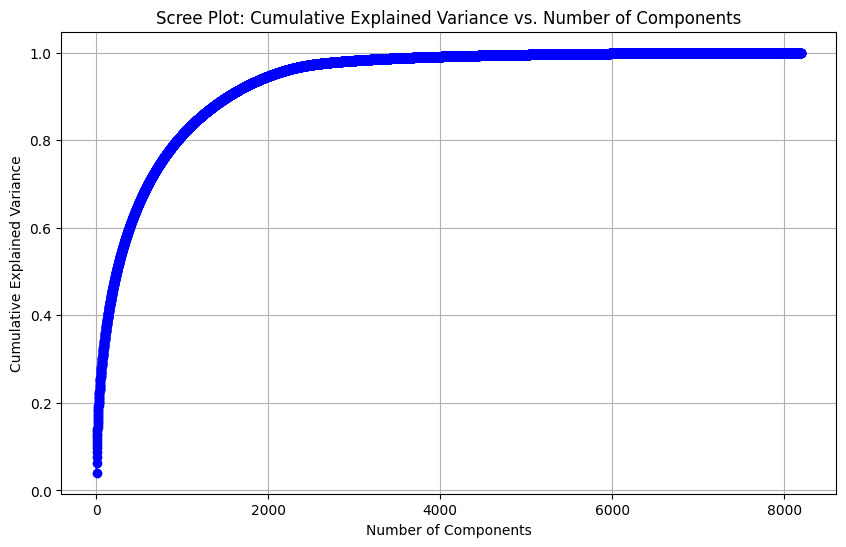

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Scree Plot: Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

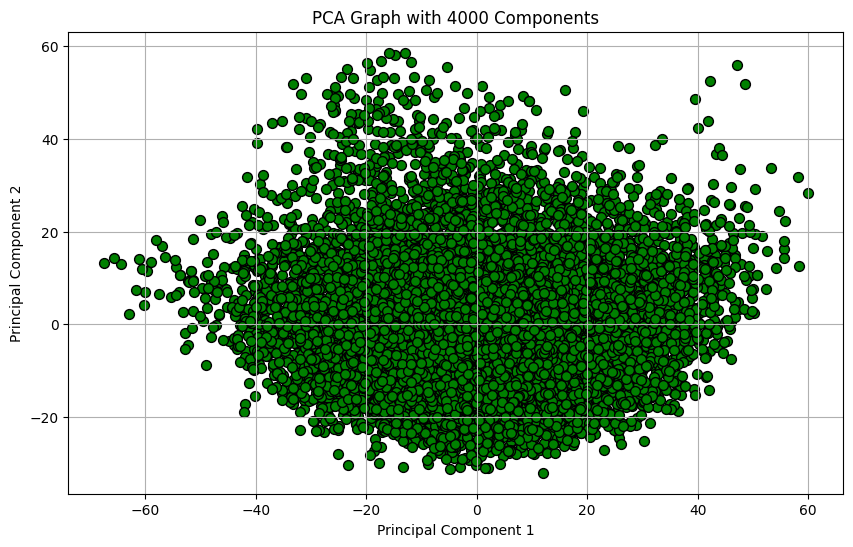

In [7]:
n_components = 4000
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c='green', edgecolor='k', s=50)
plt.title(f'PCA Graph with {n_components} Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [8]:
X_pca = pca_transformed_data

In [3]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

combined_df = pd.read_csv('/kaggle/input/combineddata/combined_features_with_labels.csv')

X = combined_df.drop(columns=['label']).values
y_text = combined_df['label'].values 

le = LabelEncoder()
y = le.fit_transform(y_text)  


**Random Forest Hyperparametrization**

In [5]:
df_new = pd.read_csv('/kaggle/input/combineddata/combined_features_with_labels.csv')

In [6]:
train_csv = pd.read_csv('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv')
test_csv = pd.read_csv('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv')
train_path='/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/'
test_path='/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/'

In [8]:
from skimage.feature import hog, local_binary_pattern
from skimage.filters import gabor
from skimage import color
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm
import os

labels_df = train_csv

X_list = []

for i in tqdm(range(labels_df.shape[0])):  
    img_path = os.path.join(train_path, labels_df['filename'][i])
    image = cv2.imread(img_path)
    
    if image is None:
        print(f"Error: Could not load image at {img_path}")
        continue  
    
    image = cv2.resize(image, (128, 128))

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    hog_features = hog(gray_image, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False, block_norm='L2-Hys')
    image_hsv = color.rgb2hsv(image) 
    
    hist_h = np.histogram(image_hsv[:, :, 0], bins=32, range=(0, 1))[0]  
    hist_s = np.histogram(image_hsv[:, :, 1], bins=32, range=(0, 1))[0]  
    hist_v = np.histogram(image_hsv[:, :, 2], bins=32, range=(0, 1))[0] 
    
    hist_h = hist_h / hist_h.sum() if hist_h.sum() > 0 else hist_h
    hist_s = hist_s / hist_s.sum() if hist_s.sum() > 0 else hist_s
    hist_v = hist_v / hist_v.sum() if hist_v.sum() > 0 else hist_v
    
    hist_combined = np.concatenate([hist_h, hist_s, hist_v])

    lbp = local_binary_pattern(gray_image, P=8, R=1, method='uniform')
    lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, 11), density=True)  
    lbp_hist = lbp_hist / lbp_hist.sum() if lbp_hist.sum() > 0 else lbp_hist  
    gabor_features = []
    for theta in range(4): 
        theta = theta / 4. * np.pi
        filt_real, filt_imag = gabor(gray_image, frequency=0.6, theta=theta)
        gabor_features.append(filt_real.mean()) 
        gabor_features.append(filt_real.std())
    gabor_features = np.array(gabor_features)

    combined_features = np.hstack([hog_features, hist_combined, lbp_hist, gabor_features])
    
    X_list.append(combined_features)

X_array = np.array(X_list)


100%|██████████| 12600/12600 [05:17<00:00, 39.66it/s]


In [4]:
import pandas as pd

In [9]:
X = pd.DataFrame(X_list)
X.shape
y = train_csv


In [11]:
print(X.shape)
print(y.shape)
print(y)

(12600, 1878)
(12600, 2)
              filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]


In [14]:
train_csv

filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

In [12]:
classes = train_csv['label'].unique()
class_dict = {label: idx for idx, label in enumerate(sorted(classes))}

y = train_csv['label'].map(class_dict)

print("Class Dictionary:", class_dict)

Class Dictionary: {'calling': 0, 'clapping': 1, 'cycling': 2, 'dancing': 3, 'drinking': 4, 'eating': 5, 'fighting': 6, 'hugging': 7, 'laughing': 8, 'listening_to_music': 9, 'running': 10, 'sitting': 11, 'sleeping': 12, 'texting': 13, 'using_laptop': 14}


In [16]:
y

0        11
1        14
2         7
3        12
4        14
         ..
12595    11
12596     1
12597    11
12598     3
12599     9
Name: label, Length: 12600, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)






TypeError: ForestClassifier.predict() missing 1 required positional argument: 'X'

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForest Test Accuracy: {accuracy:.4f}")

RandomForest Test Accuracy: 0.3444


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                               n_estimators=300, 
                               learning_rate=0.1, 
                               max_depth=5,
                              
                               alpha=10, 
                               random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model_2 = xgb.XGBClassifier(objective='binary:logistic', 
                               n_estimators=300, 
                               learning_rate=0.1, 
                               max_depth=5,
                              
                               alpha=10, 
                              subsample = 0.8, colsample_bytree = 0.8,
                               random_state=42)



xgb_model_2.fit(X_train, y_train)

y_pred = xgb_model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)



In [15]:
print(accuracy)

0.39087301587301587


In [23]:
import joblib  # For saving the model
import pickle  # For saving the model in pickle format

with open('xgboost_model_pickle.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
print("XGBoost model saved using pickle as 'xgboost_model_pickle.pkl'")

XGBoost model saved using pickle as 'xgboost_model_pickle.pkl'
